In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import numpy as np

In [21]:
# Load dataset
data = pd.read_csv('/kaggle/input/tipsdataset/tips (data for regression problem).csv')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [22]:
print(data.dtypes)

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


In [23]:
# Check for duplicates in the dataset
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop the duplicate rows in the dataset
data = data.drop_duplicates()

Number of duplicate rows: 1


In [24]:
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dummies.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

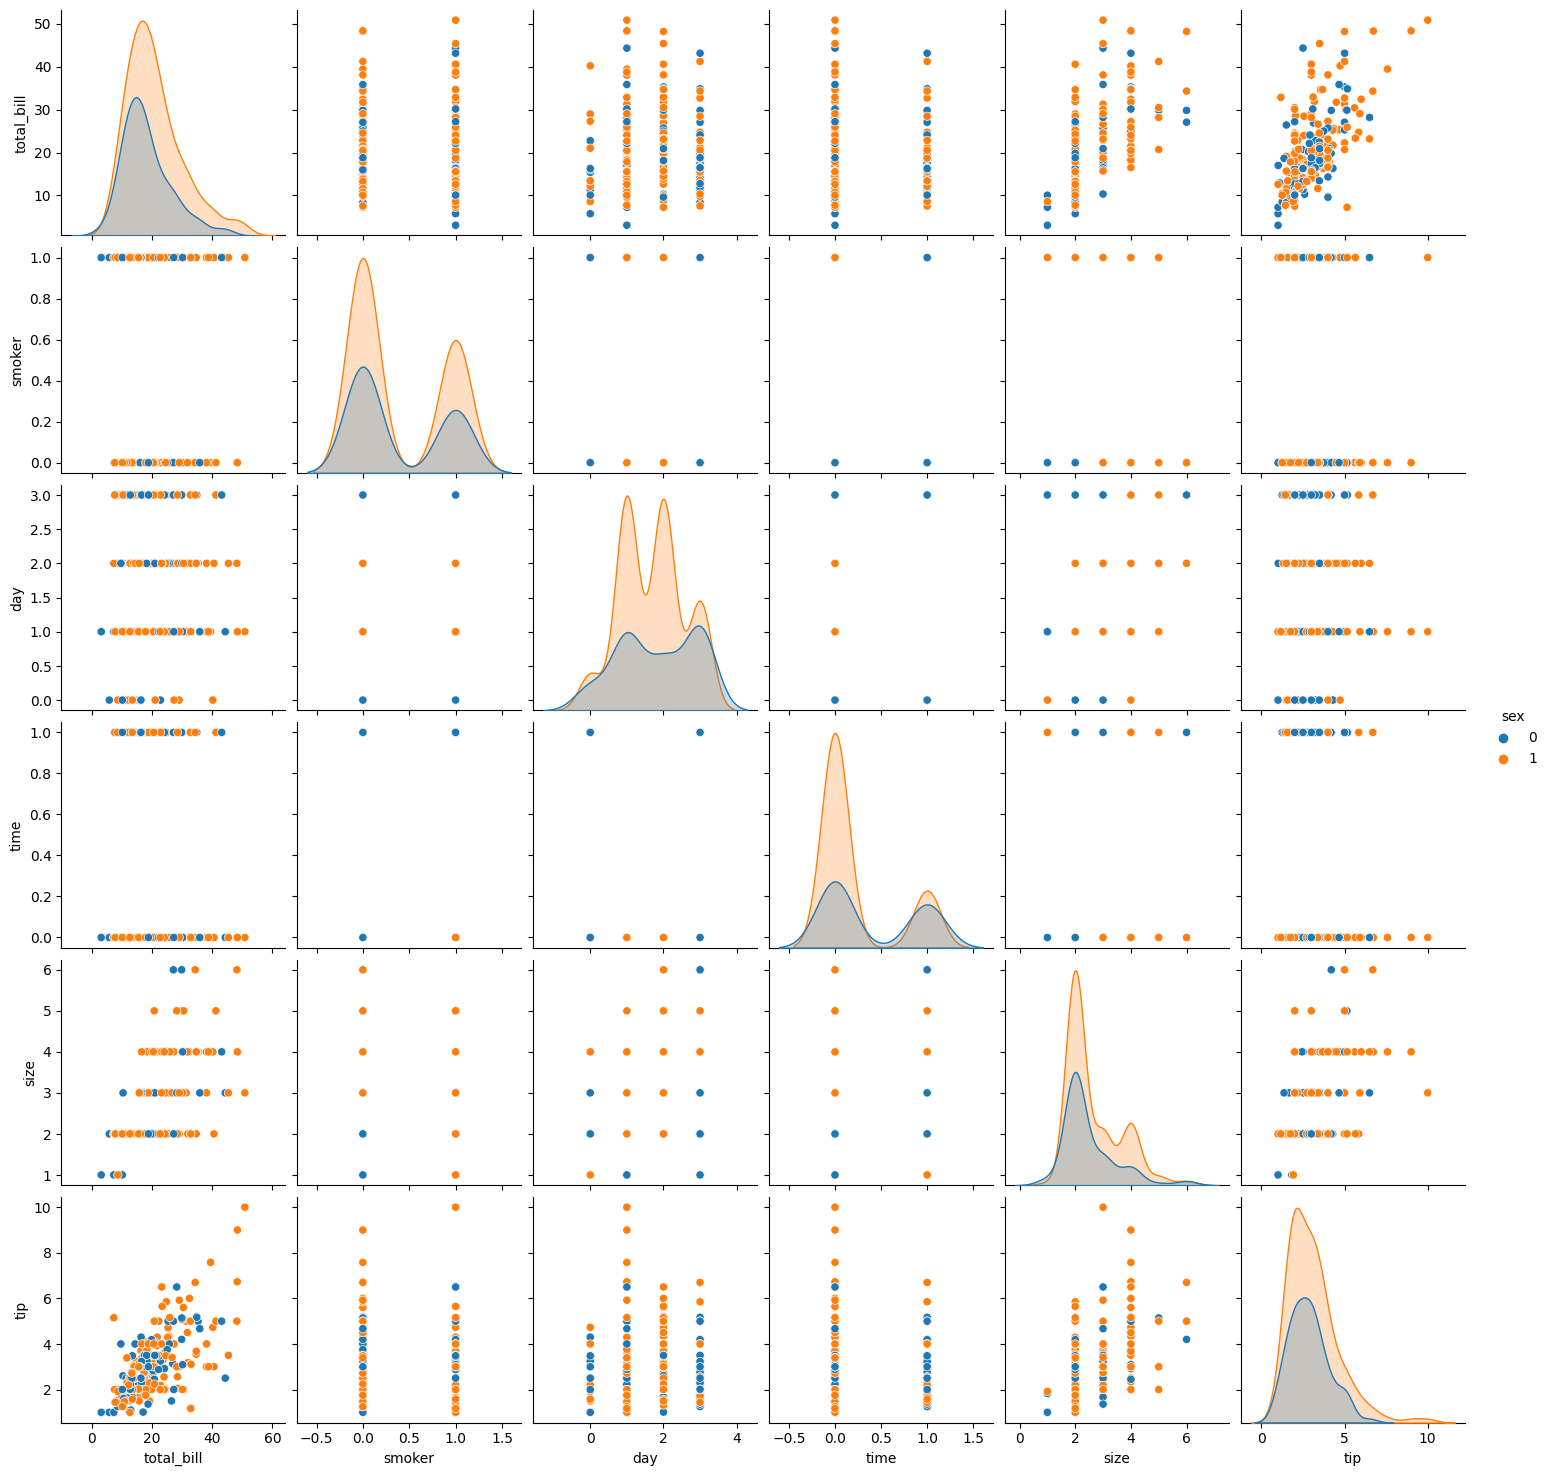

In [15]:
# Pair Plot for multiple features
sns.pairplot(data, hue='sex', vars=['total_bill', 'smoker', 'day', 'time', 'size', 'tip'])
plt.show()

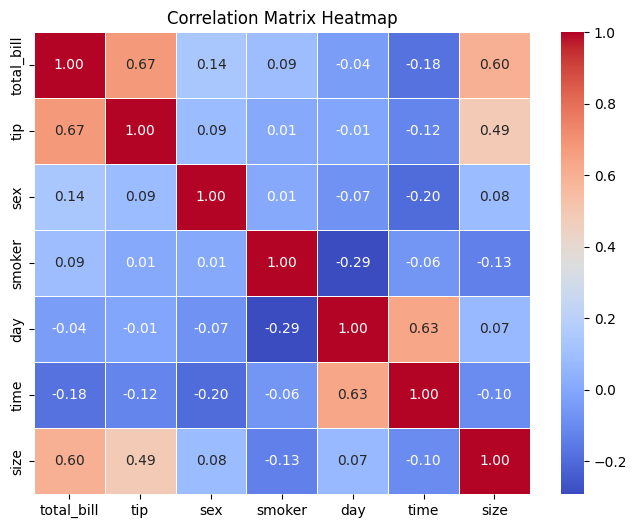

In [16]:
# Correlation Matrix and Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [17]:
# Statistical Test for Linearity (Rainbow Test)
# Using Statsmodels OLS (Ordinary Least Squares) regression to check for linearity
X_with_const = sm.add_constant(X)  # Adding constant term for intercept
ols_model = sm.OLS(y, X_with_const).fit()
print(ols_model.summary())  # Look at p-values and residuals

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     34.56
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           7.68e-30
Time:                        17:39:53   Log-Likelihood:                -346.83
No. Observations:                 243   AIC:                             707.7
Df Residuals:                     236   BIC:                             732.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7312      0.262      2.789      0.0

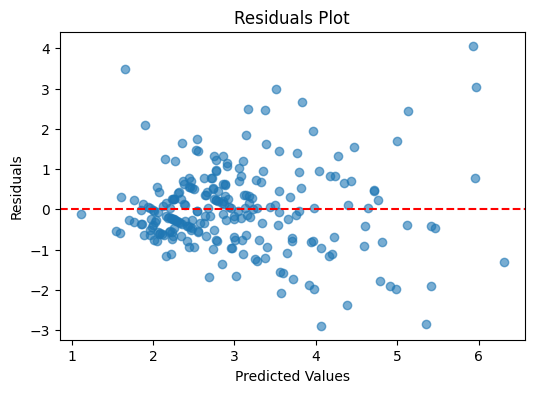

In [18]:
# Residuals Plot
y_pred = ols_model.predict(X_with_const)
residuals = y - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


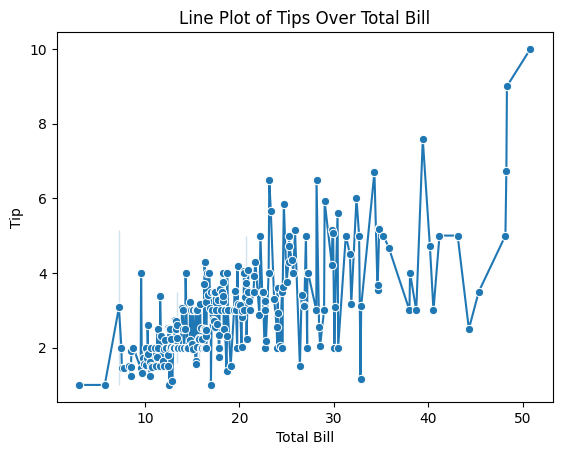

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


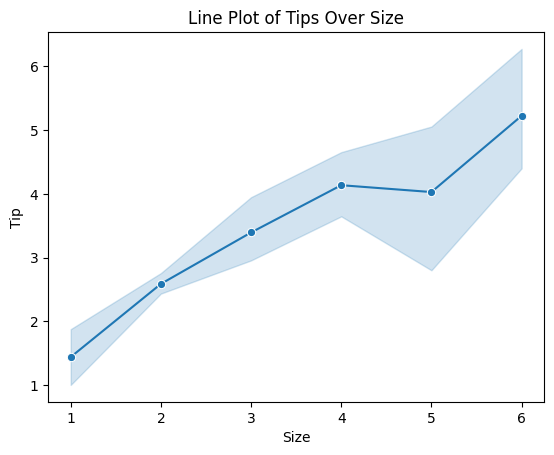

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


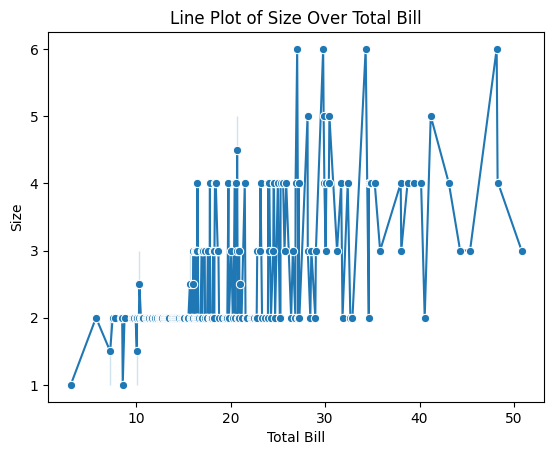

In [19]:
# Line Plot
sns.lineplot(data=data, x='total_bill', y='tip', marker='o')
plt.title('Line Plot of Tips Over Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

sns.lineplot(data=data, x='size', y='tip', marker='o')
plt.title('Line Plot of Tips Over Size')
plt.xlabel('Size')
plt.ylabel('Tip')
plt.show()

sns.lineplot(data=data, x='total_bill', y='size', marker='o')
plt.title('Line Plot of Size Over Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Size')
plt.show()

In [20]:
# 'tip' is the target, 'total_bil' and 'size' are features
X = data[['total_bill', 'size']].values  # Features
y = data['tip'].values   # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Linear Regression**
Fits a straight line through the data.

In [59]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluation
print('Linear Regression R2:', r2_score(y_test, y_pred_linear))

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R^2: {r2:.2f}")


Linear Regression R2: 0.5185656337107039
Linear Regression Model Performance:
MAE: 0.77, MSE: 1.17, RMSE: 1.08, R^2: 0.52


## **Ridge Regression**
Like linear regression but with an L2 regularization term to reduce overfitting

In [63]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))

Ridge Regression R2: 0.5198447685518528


## **Lasso Regression**
Similar to ridge but uses an L1 penalty, which can set some coefficients to zero, effectively performing feature selection.

In [27]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))

Lasso Regression R2: 0.4273315911036826


## **Decision Tree Regression**
Splits data into regions with similar values, capturing non-linear relationships.

In [62]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))


Decision Tree R2: 0.3326583733685362


## **Ensemble Method (Random Forest Regression)**
An ensemble of decision trees that improves stability and accuracy.

In [35]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
print('Random Forest R2:', r2_score(y_test, y_pred_forest))

Random Forest R2: 0.373580214948404


## **Support Vector Regression (SVR)**
Uses kernels to fit complex patterns.

In [40]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()  # Scale for features
sc_y = StandardScaler()  # Scale for target

# Scaling the features
X_train_scaled = sc_X.fit_transform(X_train)  # Scale X_train
X_test_scaled = sc_X.transform(X_test)   
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()


svr_reg = SVR(kernel='rbf') 
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_svr = svr_reg.predict(X_test_scaled)

# Inverse transform the predicted values to the original scale
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Reshape for inverse transformation

# Evaluate the performance using R^2 score
print('SVR R2:', r2_score(y_test, y_pred_svr))

SVR R2: 0.5285106537175468


## **K-Nearest Neighbors (KNN) Regression**
Predicts the target by averaging the values of the closest data points.

In [41]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))

KNN Regression R2: 0.37579996102099833


# **Feature Imaportance Analysis** 


Linear Regression Coefficients:
smoker_Yes   -0.184367
day_Thur     -0.133948
day_Sat      -0.110756
sex_Male     -0.011756
day_Sun       0.049611
total_bill    0.100405
size          0.131493
time_Lunch    0.219251
dtype: float64


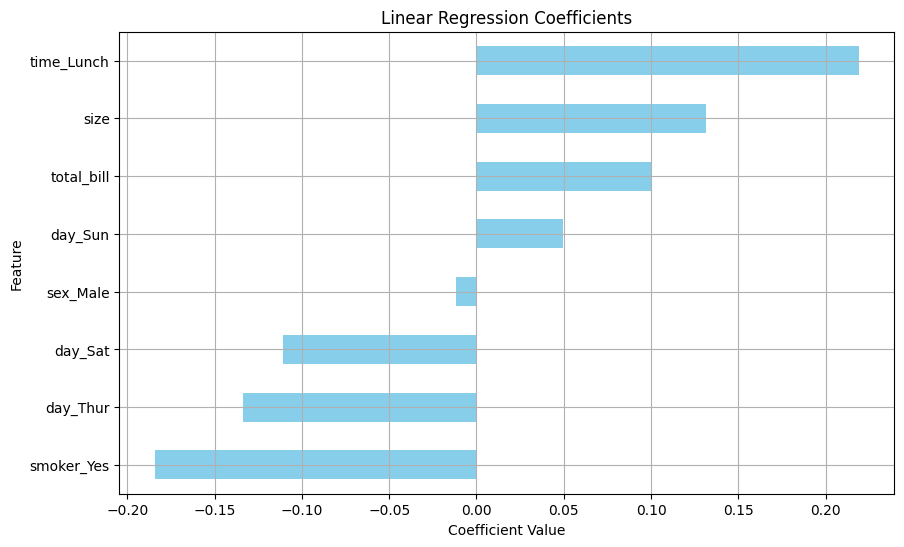

In [30]:
# 1. Linear Regression Coefficients
coefficients = pd.Series(linear_reg.coef_, index=X.columns)
coefficients = coefficients.sort_values()

print("\nLinear Regression Coefficients:")
print(coefficients)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='skyblue')
plt.title("Linear Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid()
plt.show()


 ridge Regression Coefficients:
smoker_Yes   -0.177506
day_Sat      -0.115310
day_Thur     -0.095313
sex_Male     -0.011645
day_Sun       0.044560
total_bill    0.100241
size          0.131435
time_Lunch    0.176396
dtype: float64


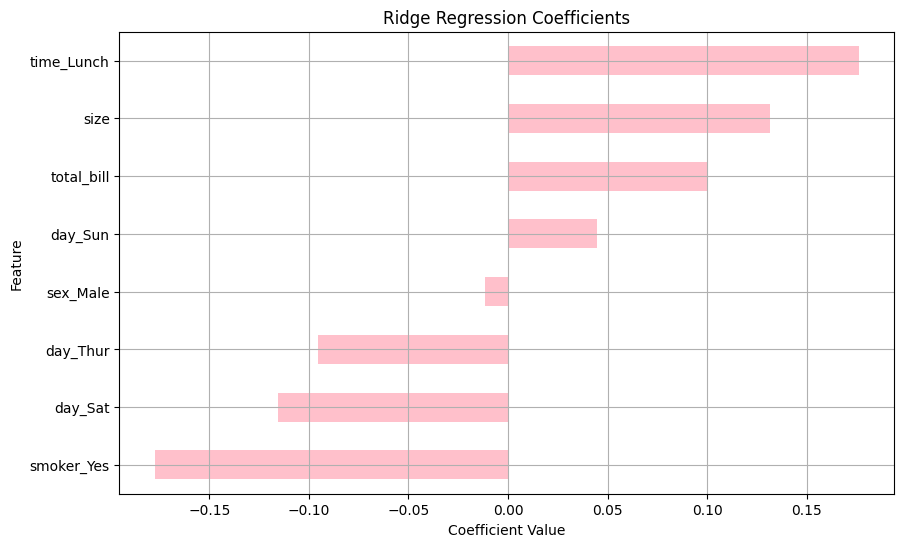

In [31]:
# Feature Importance Analysis
# 1.Ridge Regression Coefficients
coefficients = pd.Series(ridge_reg.coef_, index=X.columns)
coefficients = coefficients.sort_values()

print("\n ridge Regression Coefficients:")
print(coefficients)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='pink')
plt.title("Ridge Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid()
plt.show()


 Lasso Regression Coefficients:
smoker_Yes   -0.138530
day_Sat      -0.134849
sex_Male     -0.000000
day_Sun       0.000000
day_Thur      0.000000
time_Lunch    0.018251
total_bill    0.099691
size          0.124487
dtype: float64


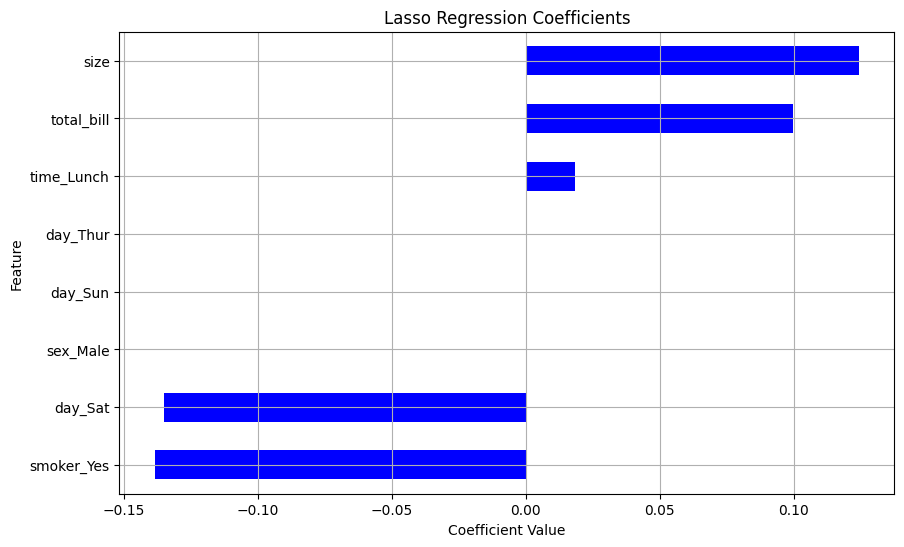

In [32]:
# Feature Importance Analysis
# 1.Lasso Regression Coefficients
coefficients = pd.Series(lasso_reg.coef_, index=X.columns)
coefficients = coefficients.sort_values()

print("\n Lasso Regression Coefficients:")
print(coefficients)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='Blue')
plt.title("Lasso Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid()
plt.show()


Random Forest Feature Importances:
day_Sun       0.010922
day_Thur      0.014673
time_Lunch    0.016508
sex_Male      0.018711
size          0.019901
day_Sat       0.028713
smoker_Yes    0.055597
total_bill    0.834976
dtype: float64


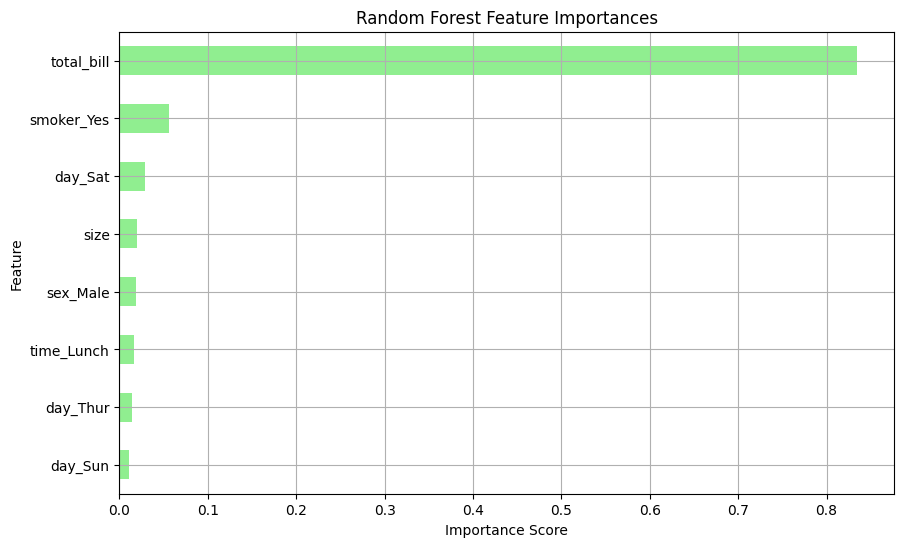

In [37]:
# Feature Importance Analysis
# 1.Decision Tree Regression Coefficients
feature_importances = pd.Series(tree_reg.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values()

print("\nRandom Forest Feature Importances:")
print(feature_importances)

# Plotting feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh', color='lightgreen')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid()
plt.show()


Permutation Feature Importances:
day_Thur     -0.050679
time_Lunch   -0.008197
day_Sat       0.017686
size          0.036736
day_Sun       0.042670
sex_Male      0.049667
smoker_Yes    0.119361
total_bill    0.947176
dtype: float64


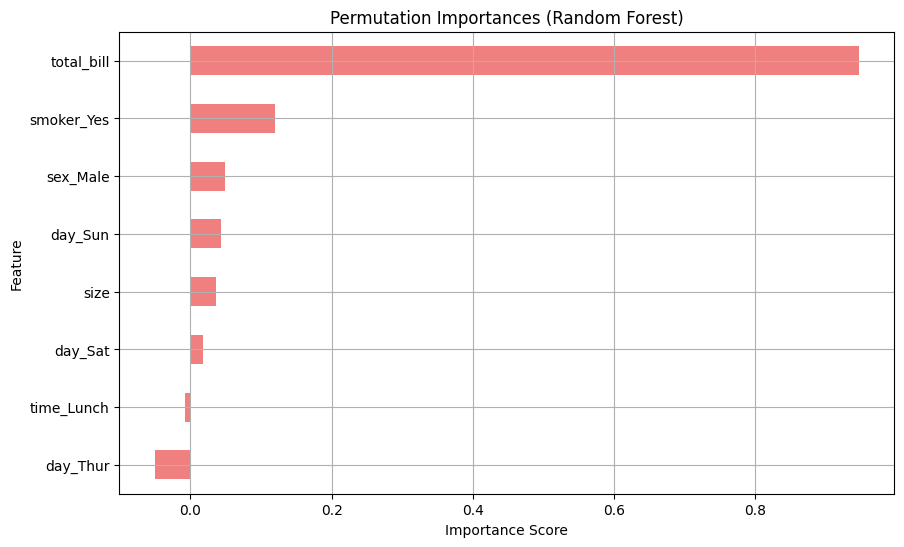

In [38]:
# 3. Permutation Importance (using Random Forest as an example)
perm_importance = permutation_importance(tree_reg, X_test, y_test, n_repeats=10, random_state=42)
perm_importance_df = pd.Series(perm_importance.importances_mean, index=X.columns)
perm_importance_df = perm_importance_df.sort_values()

print("\nPermutation Feature Importances:")
print(perm_importance_df)

# Plotting permutation importances
plt.figure(figsize=(10, 6))
perm_importance_df.plot(kind='barh', color='lightcoral')
plt.title("Permutation Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid()
plt.show()

**total bill significantly impact tip value**

## **Plotting**

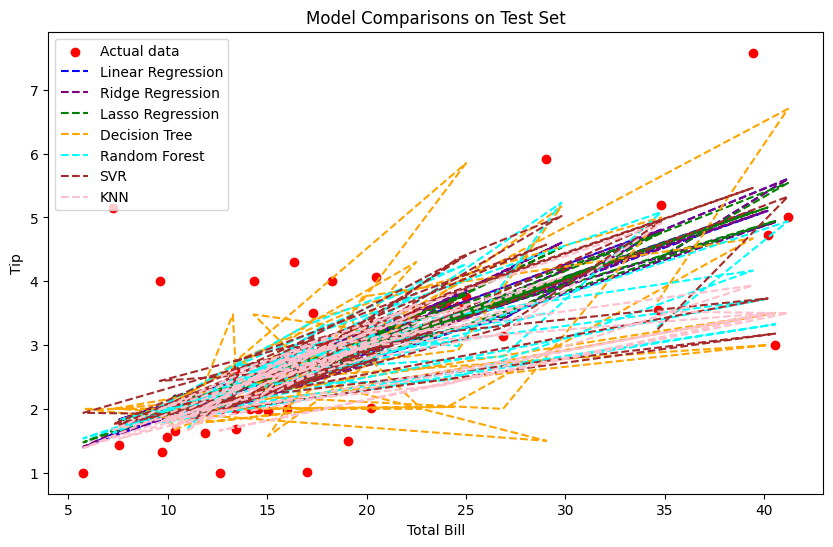

In [50]:
# Step 6: Visualize the Actual vs Predicted Tips (we'll use a specific feature like 'total_bill')
plt.figure(figsize=(10, 6))
plt.scatter(X_test['total_bill'], y_test, color='red', label='Actual data')  # Actual data (target vs. feature)

plt.plot(X_test['total_bill'], y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test['total_bill'], y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test['total_bill'], y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test['total_bill'], y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test['total_bill'], y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test['total_bill'], y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_test['total_bill'], y_pred_knn, color='pink', label='KNN', linestyle='--')


plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Model Comparisons on Test Set')
plt.legend()
plt.show()

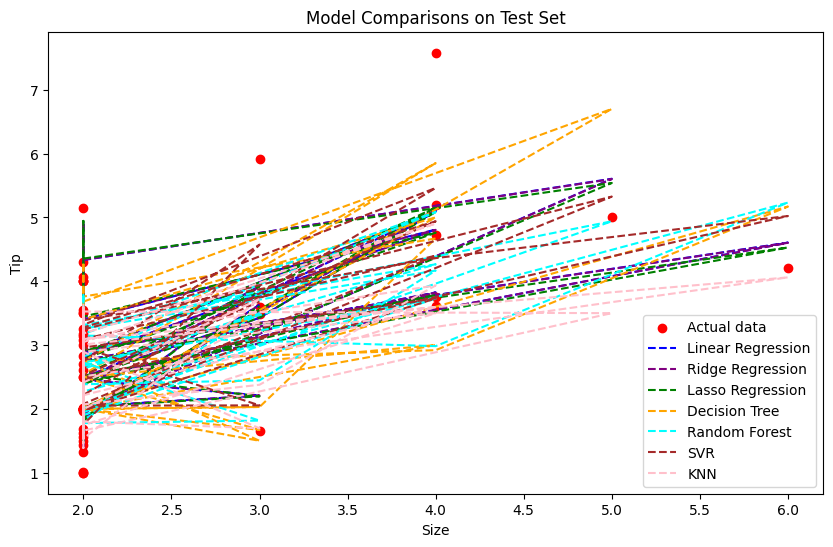

In [51]:
# Step 6: Visualize the Actual vs Predicted Tips (we'll use a specific feature like 'Size')
plt.figure(figsize=(10, 6))
plt.scatter(X_test['size'], y_test, color='red', label='Actual data')  # Actual data (target vs. feature)

plt.plot(X_test['size'], y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test['size'], y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test['size'], y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test['size'], y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test['size'], y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test['size'], y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_test['size'], y_pred_knn, color='pink', label='KNN', linestyle='--')


plt.xlabel('Size')
plt.ylabel('Tip')
plt.title('Model Comparisons on Test Set')
plt.legend()
plt.show()

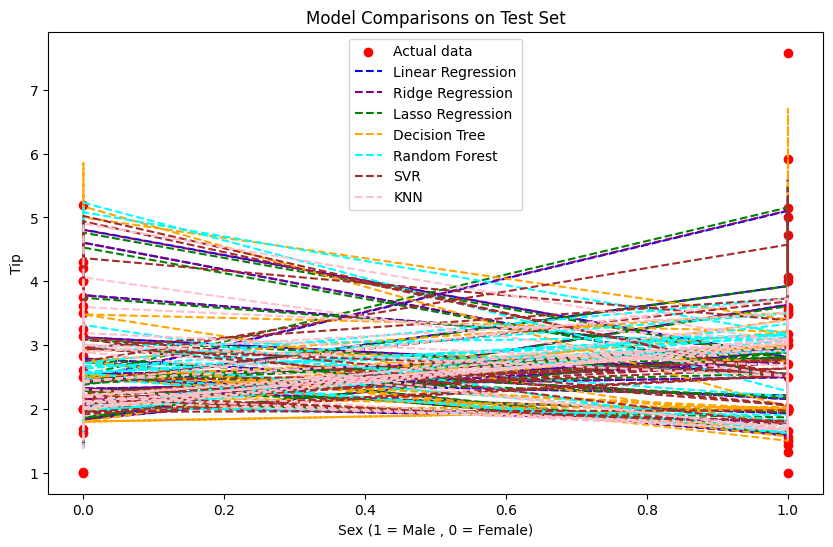

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['sex_Male'], y_test, color='red', label='Actual data')  # Actual data (target vs. feature)

plt.plot(X_test['sex_Male'], y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test['sex_Male'], y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test['sex_Male'], y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test['sex_Male'], y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test['sex_Male'], y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test['sex_Male'], y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_test['sex_Male'], y_pred_knn, color='pink', label='KNN', linestyle='--')


plt.xlabel('Sex (1 = Male , 0 = Female)')
plt.ylabel('Tip')
plt.title('Model Comparisons on Test Set')
plt.legend()
plt.show()

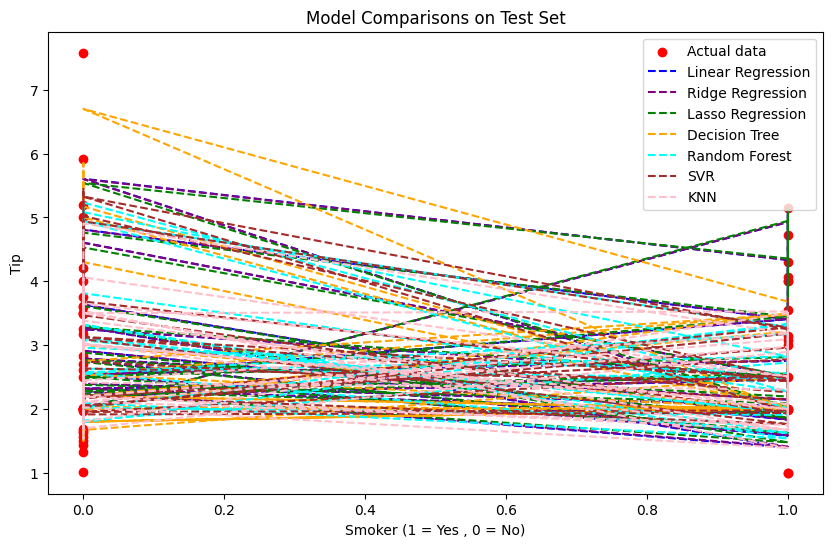

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['smoker_Yes'], y_test, color='red', label='Actual data')  # Actual data (target vs. feature)

plt.plot(X_test['smoker_Yes'], y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test['smoker_Yes'], y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test['smoker_Yes'], y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test['smoker_Yes'], y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test['smoker_Yes'], y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test['smoker_Yes'], y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_test['smoker_Yes'], y_pred_knn, color='pink', label='KNN', linestyle='--')


plt.xlabel('Smoker (1 = Yes , 0 = No)')
plt.ylabel('Tip')
plt.title('Model Comparisons on Test Set')
plt.legend()
plt.show()

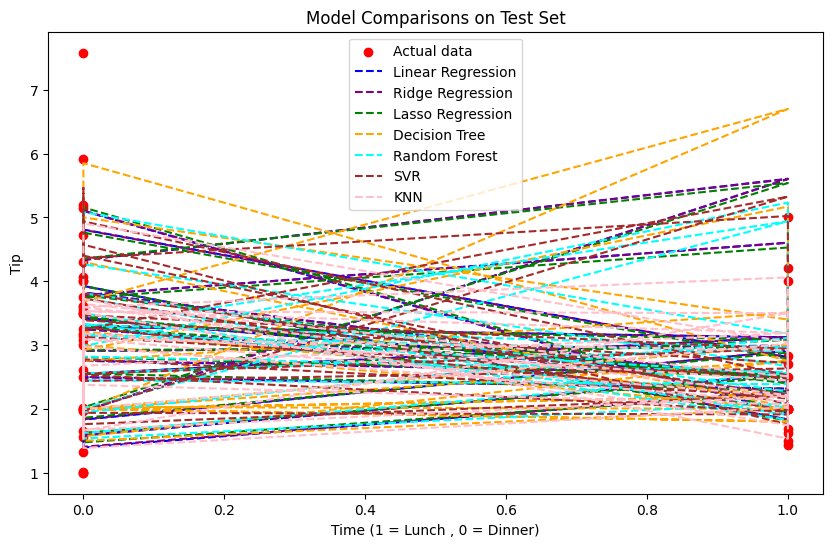

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['time_Lunch'], y_test, color='red', label='Actual data')  # Actual data (target vs. feature)

plt.plot(X_test['time_Lunch'], y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test['time_Lunch'], y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test['time_Lunch'], y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test['time_Lunch'], y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test['time_Lunch'], y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test['time_Lunch'], y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_test['time_Lunch'], y_pred_knn, color='pink', label='KNN', linestyle='--')


plt.xlabel('Time (1 = Lunch , 0 = Dinner)')
plt.ylabel('Tip')
plt.title('Model Comparisons on Test Set')
plt.legend()
plt.show()

## **Check for the whole data**

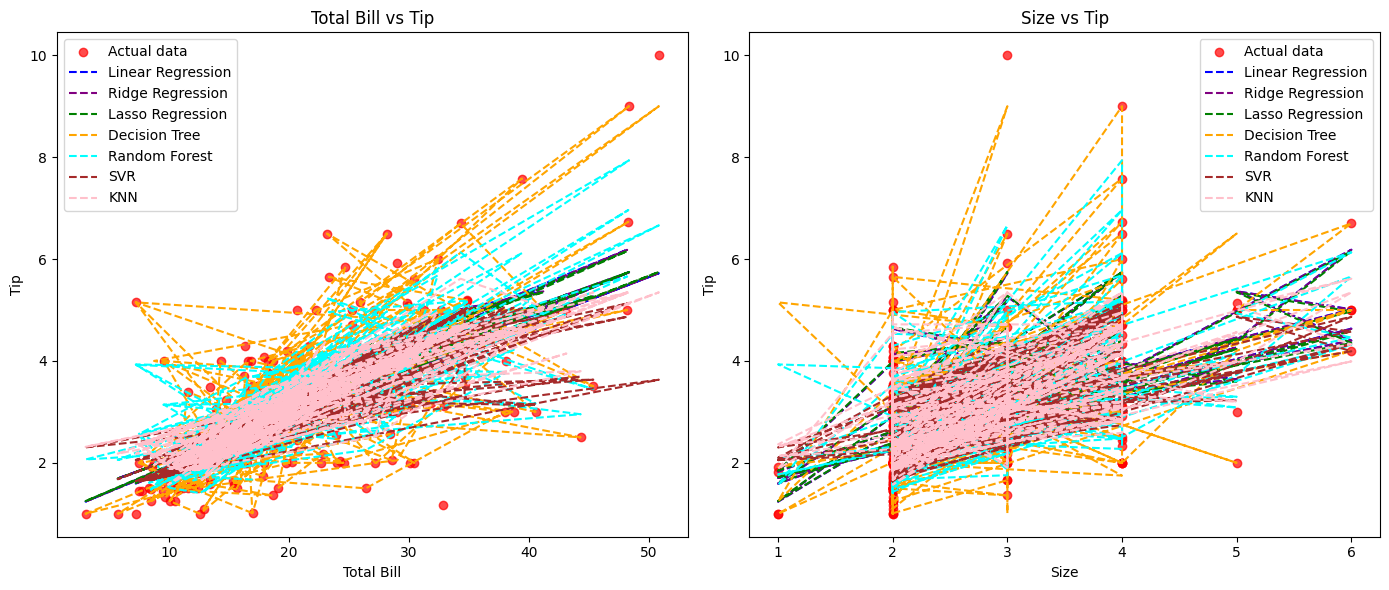

In [30]:
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)
svr_reg.fit(X_train_scaled, y_train_scaled)  # SVR with scaled data
knn_reg.fit(X_train, y_train)

# Make predictions on the entire dataset
y_pred_linear = linear_reg.predict(X)
y_pred_ridge = ridge_reg.predict(X)
y_pred_lasso = lasso_reg.predict(X)
y_pred_tree = tree_reg.predict(X)
y_pred_forest = forest_reg.predict(X)

X_scaled = sc_X.transform(X)
y_pred_svr = svr_reg.predict(X_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()

y_pred_knn = knn_reg.predict(X)

# Assuming the 'total_bill' is the first feature in X_test
total_bill = X[:, 0]  # Extract the first feature (total_bill)
size = X[:, 1]  # Extract the second feature (size)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Total Bill vs Tip
axs[0].scatter(total_bill, y, color='red', label='Actual data', alpha=0.7)
axs[0].plot(total_bill, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
axs[0].plot(total_bill, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
axs[0].plot(total_bill, y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
axs[0].plot(total_bill, y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
axs[0].plot(total_bill, y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
axs[0].plot(total_bill, y_pred_svr, color='brown', label='SVR', linestyle='--')
axs[0].plot(total_bill, y_pred_knn, color='pink', label='KNN', linestyle='--')
axs[0].set_title('Total Bill vs Tip')
axs[0].set_xlabel('Total Bill')
axs[0].set_ylabel('Tip')
axs[0].legend()

# Plot for Size vs Tip
axs[1].scatter(size, y, color='red', label='Actual data', alpha=0.7)
axs[1].plot(size, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
axs[1].plot(size, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
axs[1].plot(size, y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
axs[1].plot(size, y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
axs[1].plot(size, y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
axs[1].plot(size, y_pred_svr, color='brown', label='SVR', linestyle='--')
axs[1].plot(size, y_pred_knn, color='pink', label='KNN', linestyle='--')
axs[1].set_title('Size vs Tip')
axs[1].set_xlabel('Size')
axs[1].set_ylabel('Tip')
axs[1].legend()

plt.tight_layout()
plt.show()

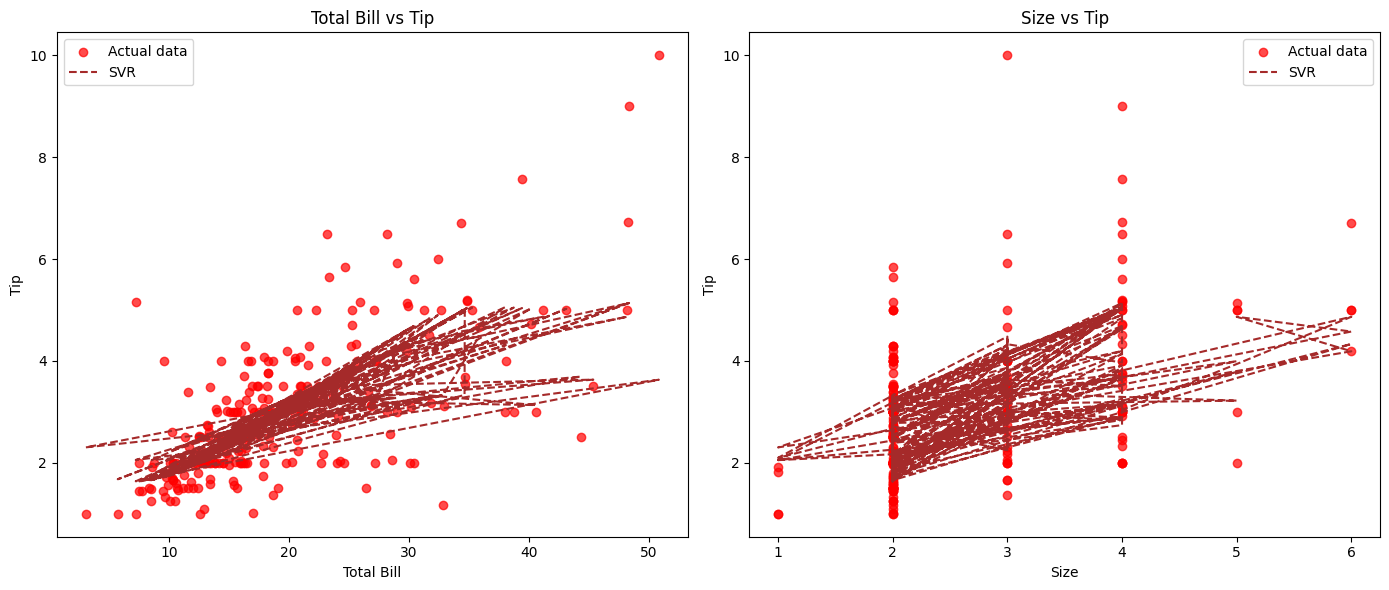

In [31]:
svr_reg.fit(X_train_scaled, y_train_scaled)  # SVR with scaled data

# Make predictions on the entire dataset
X_scaled = sc_X.transform(X)
y_pred_svr = svr_reg.predict(X_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()

# Assuming the 'total_bill' is the first feature in X_test
total_bill = X[:, 0]  # Extract the first feature (total_bill)
size = X[:, 1]  # Extract the second feature (size)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Total Bill vs Tip
axs[0].scatter(total_bill, y, color='red', label='Actual data', alpha=0.7)
axs[0].plot(total_bill, y_pred_svr, color='brown', label='SVR', linestyle='--')
axs[0].set_title('Total Bill vs Tip')
axs[0].set_xlabel('Total Bill')
axs[0].set_ylabel('Tip')
axs[0].legend()

# Plot for Size vs Tip
axs[1].scatter(size, y, color='red', label='Actual data', alpha=0.7)
axs[1].plot(size, y_pred_svr, color='brown', label='SVR', linestyle='--')
axs[1].set_title('Size vs Tip')
axs[1].set_xlabel('Size')
axs[1].set_ylabel('Tip')
axs[1].legend()

plt.tight_layout()
plt.show()

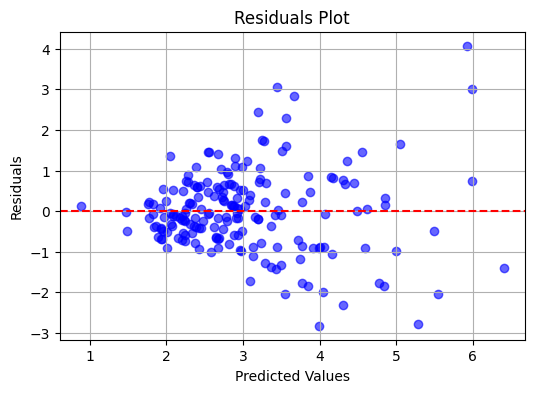

In [56]:
# Fit the Linear Regression model to the training data
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions on training data
y_train_pred = linear_reg.predict(X_train)

# Calculate residuals
residuals = y_train - y_train_pred

# Plot residuals
plt.figure(figsize=(6, 4))
plt.scatter(y_train_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)



Linear Regression Model Performance:
MAE: 0.77, MSE: 1.17, RMSE: 1.08, R^2: 0.52
